# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [594]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set_theme(context="notebook", style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [595]:
# loading the data:
customers = pd.read_csv('./Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [596]:
customers.shape

(440, 8)

In [597]:
# Your code here:

customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [598]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [599]:
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

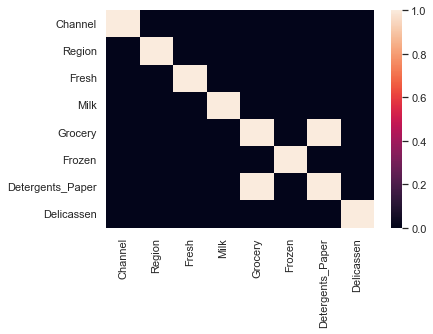

In [600]:
sns.heatmap(customers.corr()>0.8);

In [601]:
# IQR
# q1 - 3 IQR < Good Data < q3 + 3 IQR

for col in customers:
    q25 = np.quantile(customers[col], 0.25)
    q75 = np.quantile(customers[col], 0.75)
    IQR = q75 - q25
    mask = (customers[col] > (q75 + 3 * IQR)) | (customers[col] < (q25 - 3 * IQR))
    out_customers = customers[mask]

In [602]:
out_customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,2,3,6353,8808,7684,2405,3516,7844
23,2,3,26373,36423,22019,5154,4337,16523
47,2,3,44466,54259,55571,7782,24171,6465
71,1,3,18291,1266,21042,5373,4173,14472
87,1,3,43265,5025,8117,6312,1579,14351
171,2,3,200,25862,19816,651,8773,6250
181,1,3,112151,29627,18148,16745,4948,8550
183,1,3,36847,43950,20170,36534,239,47943
202,1,1,25203,11487,9490,5065,284,6854
218,2,1,18,7504,15205,1285,4797,6372


In [603]:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [604]:
customers[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].sum()

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
dtype: int64

In [605]:
total_sales = np.sum(customers[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].sum())
total_sales

14619500

In [606]:
## 50% of categories represent 77% of total sales

customers[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].sum()/total_sales

Fresh               0.361170
Milk                0.174449
Grocery             0.239308
Frozen              0.092455
Detergents_Paper    0.086724
Delicassen          0.045894
dtype: float64

In [607]:
total_purchase = pd.DataFrame(customers[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].sum(axis=1).sort_values(ascending=False))

In [608]:
total_purchase.columns = ['Customer Purchase']

In [609]:
total_purchase.head()

,Customer Purchase
85,199891
47,192714
181,190169
183,185683
61,165881


In [610]:
total_purchase['Accumulated Cust. Purchase'] = np.cumsum(total_purchase['Customer Purchase'])

In [611]:
## 20% of customers (out of 430) are responsible for 41% of retail sales

(total_purchase['Accumulated Cust. Purchase']/total_purchase['Customer Purchase'].sum()).iloc[86] 

0.4258362461096481

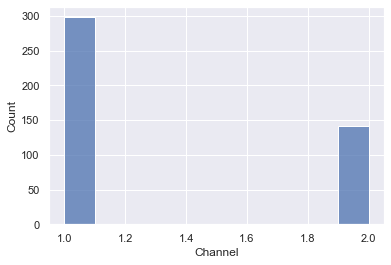

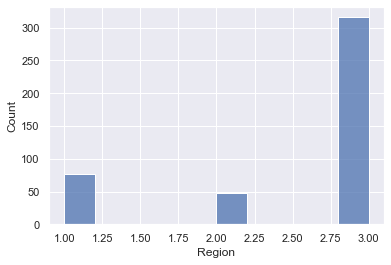

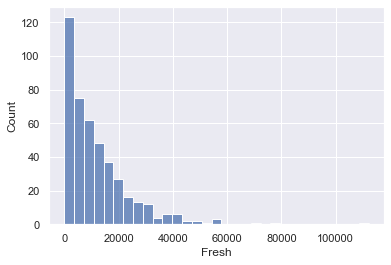

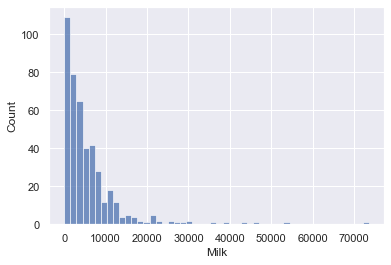

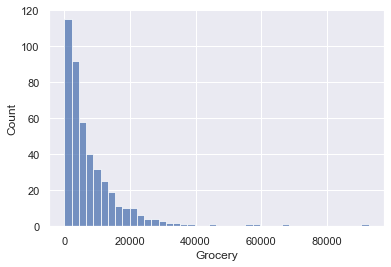

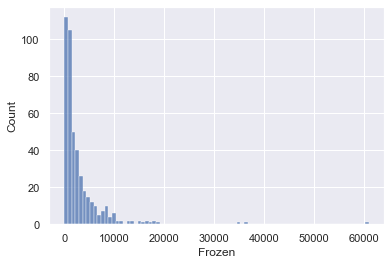

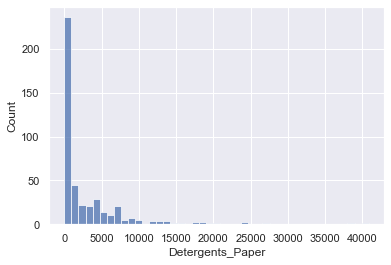

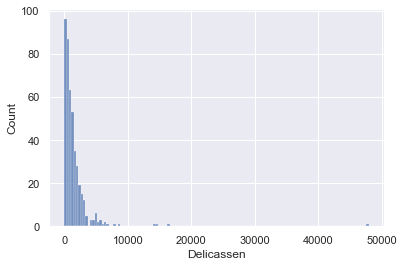

In [612]:
for col in customers:
    sns.histplot(data = customers, x = col)
    plt.show()

In [613]:
# Your observations here

# All the distributions are right skewed, with a few outliers.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [614]:
# Your code here

customers = customers[~mask]
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451


In [615]:
customers.shape

(430, 8)

In [616]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [617]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

cust_scale = StandardScaler()
cust_scale.fit(customers)

customers_scale = pd.DataFrame(cust_scale.transform(customers), columns=customers.columns)
customers_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.462425,0.592898,0.097337,0.655052,-0.012634,-0.596709,-0.030350,0.081700
1,1.462425,0.592898,-0.391300,0.678808,0.205122,-0.257900,0.101606,0.466184
2,-0.683796,0.592898,0.149231,-0.650005,-0.375017,0.758087,-0.492302,0.476718
3,1.462425,0.592898,0.963337,0.000055,-0.052019,0.213323,-0.221569,3.458663
4,1.462425,0.592898,-0.186163,0.439548,-0.276827,-0.497780,-0.217732,0.180894


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

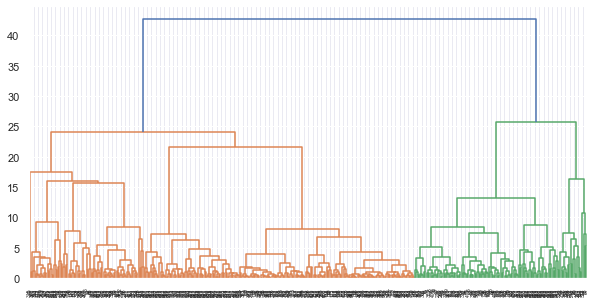

In [618]:
fig = plt.figure(figsize = (10, 5))
customers_dendogram = dendrogram(linkage(customers_scale, method = 'ward'))

In [619]:
km_fit_customers = KMeans(n_clusters=5)
km_fit_customers.fit(customers_scale)

KMeans(n_clusters=5)

In [620]:
customers["labels"] = [str(x) for x in km_fit_customers.labels_]

In [621]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,2
5,2,3,9413,8259,5126,666,1795,1451,1


Count the values in `labels`.

In [622]:
# Your code here:

customers['labels'].value_counts()

4    169
1    119
0     85
2     48
3      9
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [623]:
# Your code here

from sklearn.cluster import DBSCAN

cluster = DBSCAN(eps=0.5)
cluster.fit(customers_scale)

customers['labels_DBSCAN'] = [str(x) for x in cluster.labels_]

In [624]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,-1
3,1,3,13265,1196,4221,6404,507,1788,4,-1
4,2,3,22615,5410,7198,3915,1777,5185,2,-1
5,2,3,9413,8259,5126,666,1795,1451,1,-1


Count the values in `labels_DBSCAN`.

In [625]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    317
0     103
1      10
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

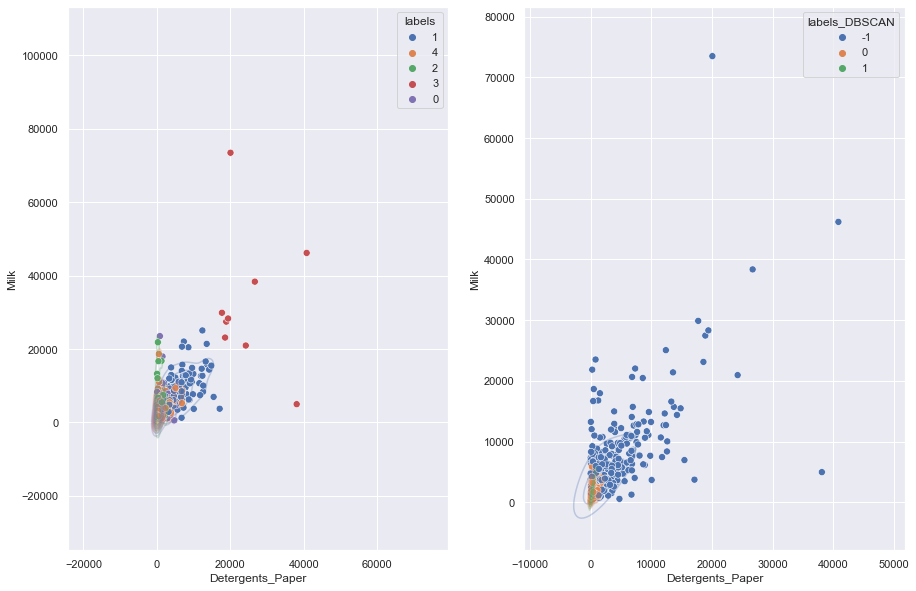

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [626]:
# Your code here:

fig, ax= plt.subplots(1, 2, figsize=(15 , 10))

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, 
    x="Detergents_Paper", y="Milk", 
    hue="labels", alpha = 0.3,
    ax=ax[0])

sns.scatterplot(
    data=customers, x="Detergents_Paper", y="Milk",
    hue="labels", s = 50,
    ax=ax[0])
ax[0].axis("equal")

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, 
    x="Detergents_Paper", y="Milk", 
    hue="labels_DBSCAN", alpha = 0.3,
    ax=ax[1])

sns.scatterplot(
    data=customers, 
    x="Detergents_Paper", y="Milk", 
    hue="labels_DBSCAN", s = 50,
    ax=ax[1])
ax[1].axis("equal");

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

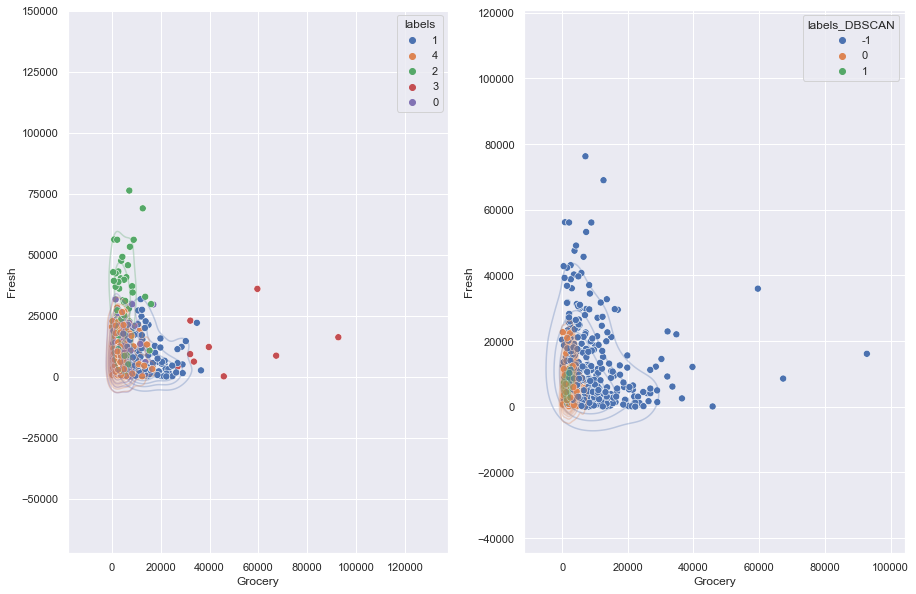

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [627]:
fig, ax= plt.subplots(1, 2, figsize=(15 , 10))

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, 
    x="Grocery", y="Fresh", 
    hue="labels", alpha = 0.3,
    ax=ax[0])

sns.scatterplot(
    data=customers, x="Grocery", y="Fresh",
    hue="labels", s = 50,
    ax=ax[0])
ax[0].axis("equal")

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, 
    x="Grocery", y="Fresh", 
    hue="labels_DBSCAN", alpha = 0.3,
    ax=ax[1])

sns.scatterplot(
    data=customers, 
    x="Grocery", y="Fresh", 
    hue="labels_DBSCAN", s = 50,
    ax=ax[1])
ax[1].axis("equal");

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

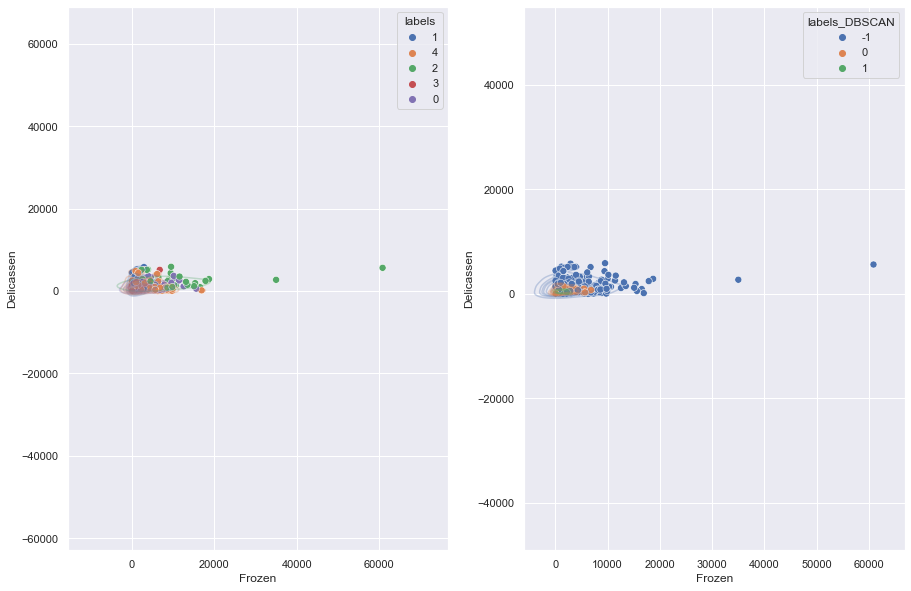

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [628]:
fig, ax= plt.subplots(1, 2, figsize=(15 , 10))

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, 
    x="Frozen", y="Delicassen", 
    hue="labels", alpha = 0.3,
    ax=ax[0])

sns.scatterplot(
    data=customers, x="Frozen", y="Delicassen",
    hue="labels", s = 50,
    ax=ax[0])
ax[0].axis("equal")

plt.figure(figsize=(10, 10))
sns.kdeplot(
    data=customers, 
    x="Frozen", y="Delicassen", 
    hue="labels_DBSCAN", alpha = 0.3,
    ax=ax[1])

sns.scatterplot(
    data=customers, 
    x="Frozen", y="Delicassen", 
    hue="labels_DBSCAN", s = 50,
    ax=ax[1])
ax[1].axis("equal");

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [629]:
grouped_lab_kmeans = customers.groupby('labels').mean()
grouped_lab_kmeans

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,,,
0,1.047059,1.317647,10344.800000,3111.364706,4065.235294,3113.988235,875.058824,1000.423529
1,2.000000,2.672269,7576.907563,8920.714286,14422.487395,1321.025210,6274.789916,1384.201681
2,1.083333,2.791667,32989.083333,4933.687500,5209.312500,8860.562500,718.000000,2240.750000
3,2.000000,2.444444,12798.111111,32536.222222,47755.333333,2529.333333,24953.444444,2551.444444
4,1.005917,3.000000,8800.857988,2783.857988,3311.443787,2333.621302,774.644970,917.420118


In [630]:
grouped_lab_dbscan = customers.groupby('labels_DBSCAN').mean()
grouped_lab_dbscan

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,,,
-1,1.432177,2.44164,12907.870662,6704.470032,9621.643533,3381.621451,3667.044164,1471.977918
0,1.000000,3.00000,7829.009709,1785.805825,2275.339806,1731.436893,442.203883,624.106796
1,1.000000,1.00000,6878.100000,1689.100000,1687.900000,1403.200000,304.000000,441.900000


In [631]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,-1
3,1,3,13265,1196,4221,6404,507,1788,4,-1
4,2,3,22615,5410,7198,3915,1777,5185,2,-1
5,2,3,9413,8259,5126,666,1795,1451,1,-1


Which algorithm appears to perform better?

In [632]:
# Your observations here

variance_kmeans = (grouped_lab_kmeans.max() - grouped_lab_kmeans.min()).reset_index()
variance_kmeans.sort_values(0, ascending=False) 

,index,0
4,Grocery,44443.889546
3,Milk,29752.364234
2,Fresh,25412.175770
6,Detergents_Paper,24235.444444
5,Frozen,7539.537290
7,Delicassen,1634.024326
1,Region,1.682353
0,Channel,0.994083


In [633]:
variance_dbscan = (grouped_lab_dbscan.max() - grouped_lab_dbscan.min()).reset_index()
variance_dbscan.sort_values(0, ascending=False) 

,index,0
4,Grocery,7933.743533
2,Fresh,6029.770662
3,Milk,5015.370032
6,Detergents_Paper,3363.044164
5,Frozen,1978.421451
7,Delicassen,1030.077918
1,Region,2.000000
0,Channel,0.432177


In [634]:
variances = pd.concat([variance_kmeans, variance_dbscan], axis=1)
variances.columns = ['Category', 'Variance KMeans', 'Drop', 'Variance DBScan']
variances.drop('Drop', axis=1, inplace=True)
variances = variances.set_index('Category')
variances

,Variance KMeans,Variance DBScan
Category,,
Channel,0.994083,0.432177
Region,1.682353,2.000000
Fresh,25412.175770,6029.770662
Milk,29752.364234,5015.370032
Grocery,44443.889546,7933.743533
Frozen,7539.537290,1978.421451
Detergents_Paper,24235.444444,3363.044164
Delicassen,1634.024326,1030.077918


In [635]:
## KMeans is better since the variance between the clusters is better for most categories

variances['Diff of vars'] = variances['Variance KMeans'] - variances['Variance DBScan']
variances.sort_values('Diff of vars', ascending=False)['Diff of vars'].reset_index()

,Category,Diff of vars
0,Grocery,36510.146013
1,Milk,24736.994203
2,Detergents_Paper,20872.400280
3,Fresh,19382.405108
4,Frozen,5561.115839
5,Delicassen,603.946408
6,Channel,0.561906
7,Region,-0.317647


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [636]:
customers_scale_bonus = customers_scale.copy()

In [637]:
customers_bonus = customers.copy()

In [638]:
def n_kmeans(dataframe):
    clusters = [2, 3, 4, 5, 6, 7]
    for k in clusters:
        km_fit_customers = KMeans(n_clusters=k)
        km_fit_customers.fit(dataframe)
        customers_bonus[f"labels_bonus_k_{k}"] = [str(x) for x in km_fit_customers.labels_]

In [639]:
n_kmeans(customers_scale_bonus)

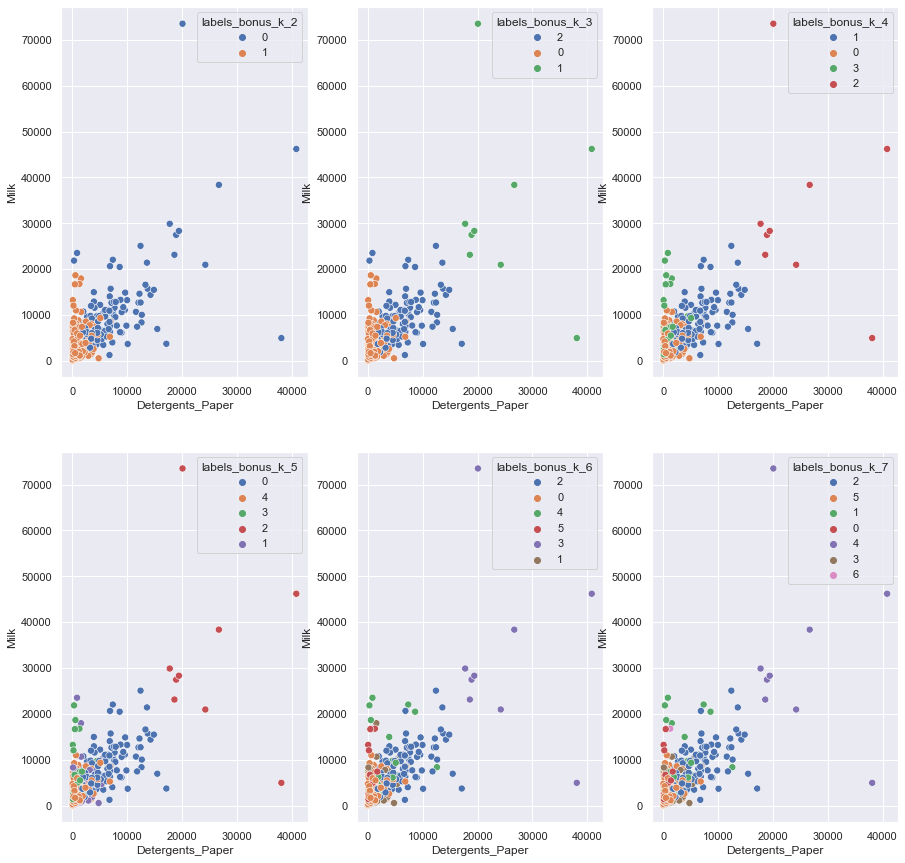

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [640]:
fig, ax = plt.subplots(2, 3, figsize=(15, 15))


plt.figure(figsize=(10, 10))
sns.scatterplot(data=customers_bonus, x="Detergents_Paper", y="Milk", hue="labels_bonus_k_2", s = 50, ax=ax[0][0]);

plt.figure(figsize=(10, 10))
sns.scatterplot(data=customers_bonus, x="Detergents_Paper", y="Milk", hue="labels_bonus_k_3", s = 50, ax=ax[0][1]);

plt.figure(figsize=(10, 10))
sns.scatterplot(data=customers_bonus, x="Detergents_Paper", y="Milk", hue="labels_bonus_k_4", s = 50, ax=ax[0][2]);


plt.figure(figsize=(10, 10))
sns.scatterplot(data=customers_bonus, x="Detergents_Paper", y="Milk", hue="labels_bonus_k_5", s = 50, ax=ax[1][0]);

plt.figure(figsize=(10, 10))
sns.scatterplot(data=customers_bonus, x="Detergents_Paper", y="Milk", hue="labels_bonus_k_6", s = 50, ax=ax[1][1]);

plt.figure(figsize=(10, 10))
sns.scatterplot(data=customers_bonus, x="Detergents_Paper", y="Milk", hue="labels_bonus_k_7", s = 50, ax=ax[1][2]);


In [579]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [641]:
customers_bonus2 = customers.drop(['labels', 'labels_DBSCAN'], axis=1)
customers_scale_bonus2 = customers_scale.copy()

In [642]:
# Your code here

from sklearn.neighbors import NearestNeighbors

neighbors = int(len(customers_bonus2.columns) * 2)
neighbors

16

In [643]:
nbrs = NearestNeighbors(n_neighbors=neighbors)
nbrs.fit(customers_scale_bonus2)

NearestNeighbors(n_neighbors=16)

In [644]:
distances, indices = nbrs.kneighbors(customers_scale_bonus2)

In [645]:
tb_distances = pd.DataFrame(distances)
tb_distances.columns = ["N_" + str(i) for i in range(neighbors)]
tb_distances.head()

,N_0,N_1,N_2,N_3,N_4,N_5,N_6,N_7,N_8,N_9,N_10,N_11,N_12,N_13,N_14,N_15
0,0.0,0.501348,0.752848,0.801347,0.839418,0.845036,0.851050,0.926438,0.965980,0.995758,1.004125,1.096290,1.145085,1.172740,1.179693,1.186411
1,0.0,0.589505,0.603642,0.628760,0.644277,0.668025,0.710556,0.740386,0.752848,0.756644,0.801568,0.812743,0.848919,0.881440,0.954624,0.971524
2,0.0,0.458154,0.772518,0.798538,0.832216,0.840700,0.921249,0.965770,0.989541,1.009321,1.029235,1.060365,1.076131,1.097860,1.103091,1.103639
3,0.0,1.271556,1.876283,2.008964,2.281777,2.294301,2.363359,2.507279,2.526386,2.567511,2.593251,2.599001,2.722629,2.751905,2.785504,2.808249
4,0.0,0.501348,0.657304,0.676374,0.756644,0.760846,0.774601,0.947142,0.999062,1.015337,1.025513,1.055147,1.068149,1.089337,1.097276,1.116121


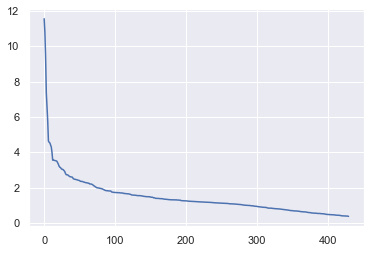

In [646]:
distance_desc = sorted(distances[:,-1], reverse=True)
plt.plot(distance_desc);

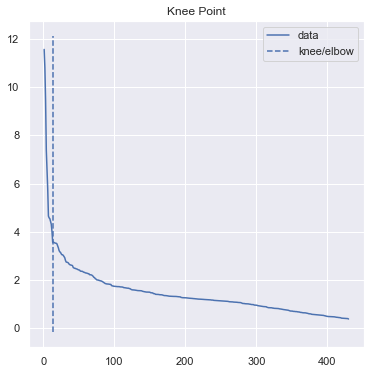

In [647]:
from kneed import KneeLocator

kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc,
                      S=2,
                      curve="convex",
                      direction="decreasing")
kneedle.plot_knee();

In [648]:
print(f"Optimal Knee found at eps = {np.round(kneedle.knee_y, 2)}\nwith min_samples = {neighbors}")

Optimal Knee found at eps = 3.56
with min_samples = 16


In [649]:
db_fit_bonus = DBSCAN(eps = 3.56, min_samples = 16)
db_fit_bonus.fit(customers_scale_bonus2)

DBSCAN(eps=3.56, min_samples=16)

In [650]:
customers_bonus2['labels_bonus2'] = [str(x) for x in db_fit_bonus.labels_]
customers_bonus2['labels_bonus2'].value_counts()

0     423
-1      7
Name: labels_bonus2, dtype: int64

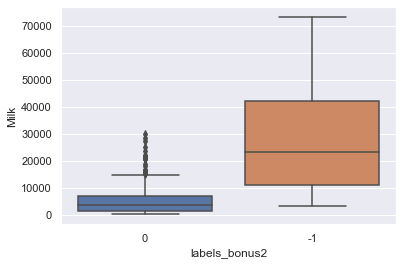

In [651]:
sns.boxplot(data=customers_bonus2, x='labels_bonus2', y='Milk');

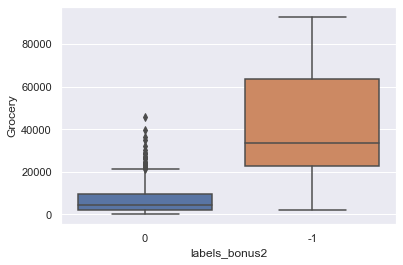

In [652]:
sns.boxplot(data=customers_bonus2, x='labels_bonus2', y='Grocery');

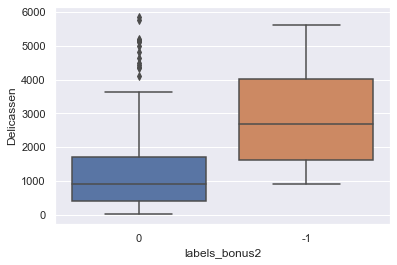

In [653]:
sns.boxplot(data=customers_bonus2, x='labels_bonus2', y='Delicassen');

In [654]:
# Your comment here